# **Jeu de Nim**

Pour ce code, je me suis inspiré du cours de Mathis Fédérico (disponible ici : https://www.youtube.com/watch?v=W8a3H_C5fZ0)

Dans le cadre du jeu de Nim, le but de ce script est de déterminer les actions optimales au jeu de Nim. Pour cela, nous allons calculer les valeurs d'actions et valeurs d'états des différents états et des différentes actions possibles dans le jeu.

# 1) Importations et paramètres du jeu

In [169]:
import numpy as np
import matplotlib.pyplot as plt

nb_sticks = 20

# 2) Initialisation des états, des actions, des récompenses et des probabilités de transition

In [170]:
# Etats
states = np.concatenate([range(nb_sticks+1), [-1]]) # -1 est un état "puits", sur lequel on reste indéfiniment quand on y est
nb_states = len(states)

# Actions
actions = [1, 2, 3]
nb_actions = len(actions)

print("States : ", states)
print("Actions : ", actions)

States :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 -1]
Actions :  [1, 2, 3]


In [171]:
# Récompenses
# La récompense est -1 si après avoir joué on arrive sur l'état 0, et 1 si après avoir joué le joueur adverse arrive sur l'état 1
R = np.zeros((nb_actions, nb_states))
for act in actions:
  for j in range(act+1):
    R[act-1][j] = -1
  R[act-1][act+1] = 1

print("Recompenses : \n", R)

Recompenses : 
 [[-1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [-1. -1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]
 [-1. -1. -1. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.]]


In [172]:
# Probabilités
P = np.zeros((nb_actions, nb_states, nb_states))
for act in actions:
  P[act-1][0][-1] = 1 # Si on est déjà à l'état 0, on va sur l'état puits -1

  for state in range(1, nb_states):
    new_state = state - act
    if new_state <= 0:
      # Si l'état futur de l'adversaire est inférieur à 0, c'est qu'on a atteri sur l'état 0
      P[act - 1][state][0] = 1
    else:
      next_possible_states = np.array([new_state for _ in range(nb_actions)]) - actions
      next_possible_states[next_possible_states < 0] = 0

      unique_states = np.unique(next_possible_states)

      for st in unique_states:
        P[act-1][state][st] = np.count_nonzero(next_possible_states == st) / nb_actions

# 3) Calcul des valeurs d'états

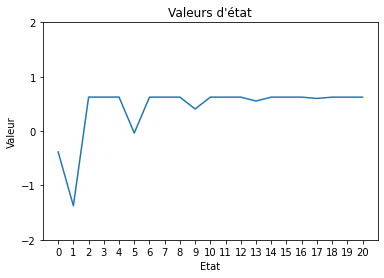

In [199]:
gamma = 0.99
nb_steps = 50

V = np.array([0 for _ in range(nb_states)])

for _ in range(nb_steps):
  V = np.amax(R + gamma*np.matmul(P,V), axis=0)

plt.plot(states[:-1], V[:-1])
plt.title("Valeurs d'état")
plt.xlabel('Etat')
plt.ylabel('Valeur')
plt.xticks(states[:-1])
plt.yticks([-2, -1, 0, 1, 2])
plt.show()

# 4) Calcul des valeurs d'actions

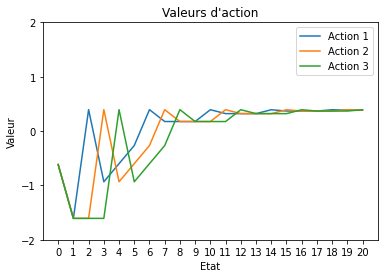

In [201]:
gamma = 0.99
nb_steps = 100

Q = np.zeros((nb_actions, nb_states))

for _ in range(nb_steps):
  Q = R + gamma*np.matmul(P, np.amax(Q, axis=0))

for i in range(nb_actions):
  plt.plot(states[:-1], Q[i, :-1])
plt.legend(['Action 1', 'Action 2', 'Action 3'])
plt.title("Valeurs d'action")
plt.xlabel('Etat')
plt.ylabel('Valeur')
plt.xticks(states[:-1])
plt.yticks([-2, -1, 0, 1, 2])

plt.show()

In [202]:
Q.shape

(3, 22)

# 5) Test

In [212]:
def check_win(current_nb_sticks):
  if current_nb_sticks <= 0:
    print("Vous avez gagné")

  elif current_nb_sticks == 1:
    print("Vous avez perdu")

current_nb_sticks = nb_sticks

print("La partie commence avec {} bâtons".format(current_nb_sticks))
while (current_nb_sticks >= 1):
  agent_action = np.argmax(Q[:, current_nb_sticks])
  current_nb_sticks -= actions[agent_action]
  print("L'agent a retiré {} bâtons".format(actions[agent_action]))
  print("Il reste {} bâtons".format(current_nb_sticks))


  if current_nb_sticks <= 0:
    print("Vous avez gagné")
    break

  elif current_nb_sticks == 1:
    print("Vous avez perdu")
    break

  else:
    player_action = int(input("Choisissez un nombre de bâtons à retirer (parmi {}) : ".format(actions)))
    current_nb_sticks -= player_action
    print("Il reste {} bâtons\n".format(current_nb_sticks))


    if current_nb_sticks <= 0:
      print("Vous avez perdu")
      break

    elif current_nb_sticks == 1:
      print("Vous avez gagné")
      break

La partie commence avec 20 bâtons
L'agent a retiré 3 bâtons
Il reste 17 bâtons
Choisissez un nombre de bâtons à retirer (parmi [1, 2, 3]) : 2
Il reste 15 bâtons

L'agent a retiré 2 bâtons
Il reste 13 bâtons
Choisissez un nombre de bâtons à retirer (parmi [1, 2, 3]) : 3
Il reste 10 bâtons

L'agent a retiré 1 bâtons
Il reste 9 bâtons
Choisissez un nombre de bâtons à retirer (parmi [1, 2, 3]) : 1
Il reste 8 bâtons

L'agent a retiré 3 bâtons
Il reste 5 bâtons
Choisissez un nombre de bâtons à retirer (parmi [1, 2, 3]) : 1
Il reste 4 bâtons

L'agent a retiré 3 bâtons
Il reste 1 bâtons
Vous avez perdu
